<a href="https://colab.research.google.com/github/TheTonyZhou/JSC270-A4/blob/main/Assignment_4_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
api_key = 'k4yPuNFiTgwROrOSCD3Bdm7zq'

api_secret_key = 'fVFXJOEq7Cnlya6NY0gQVkqAnkAnfW0PqIDoBocqZQ5cO78cMc'

access_key =  '1507138918461976578-6VO5QanRTqtLp3CWoImY6FM7oV5Yjq'

access_secret = 'Eh4nw2AAaDt3MXtDNyv5PV4CElTjchsgBiDOIvwzfI75b'

bearer_token = 'AAAAAAAAAAAAAAAAAAAAAMXxagEAAAAAPSJckY7rlydPs0Y1O%2FVGSxlV0P0%3DuYoSAAPRVMNTXUVbXgp5VSsiqvS44jJ1Or8dg9d3IOCMQEXtvM'

In [105]:
import csv
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.stem.porter import *
from nltk.corpus import stopwords
import numpy as np

In [106]:
import tweepy as tw

# Use credentials to authorize access
auth = tw.auth.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_key, access_secret)

# essential v2
# auth = tw.Client(bearer_token, api_key, api_secret_key, access_key, access_secret)

api = tw.API(auth, wait_on_rate_limit=True)

In [107]:
search_words = 'Amber Alert'
date_since = "2022-04-01"
date_until = "2022-04-02"

# Filter out duplicate search words
search_with_filter = search_words + " -filter:retweets"

tweets = tw.Cursor(api.search,
              q=search_with_filter,
              lang="en",
              since=date_since,
              until=date_until,
              tweet_mode='extended'
              ).items(2000)

# Open/create a file to append data to
csvFile = open('result_not_hashtag_20220401_full.csv', 'w')

#Use csv writer
csvWriter = csv.writer(csvFile)
csvWriter.writerow(['datetime', 'tweet'])
for tweet in tweets:
  # Write a row to the CSV file. I use encode UTF-8
  if 'retweeted_status' in tweet._json:
      msg = tweet._json['retweeted_status']['full_text']
  else:
      msg = tweet.full_text
  # print(msg)
  csvWriter.writerow([tweet.created_at, msg])
csvFile.close()

In [108]:
# DEPRECIATED

# Open/create a file to append data to
# csvFile = open('result_not_hashtag.csv', 'a')

# #Use csv writer
# csvWriter = csv.writer(csvFile)

# for tweet in tweets:
#   # Write a row to the CSV file. I use encode UTF-8
#     csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
# csvFile.close()

In [109]:
# # Open/create a file to append data to
# csvFile = open('result2.csv', 'a')

# #Use csv writer
# csvWriter = csv.writer(csvFile)

In [110]:
# # The result is an iterable
# for tweet in tweets:
#   # Write a row to the CSV file. I use encode UTF-8
#     csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

In [111]:
# csvFile.close()

In [112]:
# from google.colab import files
# files.upload()



In [113]:
# labelled_data = open('labelled_data.csv', 'r')
# csvReader = csv.reader(labelled_data)

# rows = []
# for row in csvReader:
#   rows.append(row)


In [114]:
labelled_data = pd.read_csv('https://raw.githubusercontent.com/TheTonyZhou/JSC270-A4/main/Data/labelled_data.csv')

In [115]:
unlabelled_data = pd.read_csv('https://raw.githubusercontent.com/TheTonyZhou/JSC270-A4/main/Data/unlabelled_data.csv')

## Data Inspection

In [116]:
labelled_data

datetime                                         full_tweet  \
0     25/3/2022 23:54  The Tennessee Bureau of Investigation has issu...   
1     25/3/2022 23:53  TBI Issues Amber Alert for Franklin Child: htt...   
2     25/3/2022 23:51  @TBInvestigation @FranklinTNPD Why did it take...   
3     25/3/2022 23:47  ���� AMBER Alert ���� | TBI has issued an AMBE...   
4     25/3/2022 23:47  @TBInvestigation @FranklinTNPD I thought it wa...   
...               ...                                                ...   
1218  30/3/2022 21:32  @CityNewsVAN Why am I receiving an Amber Alert...   
1219  30/3/2022 20:53  @CityNewsVAN People who complain about the Amb...   
1220    1/4/2022 0:57  If you send a 200 decibel Amber Alert at 3am t...   
1221    1/4/2022 1:36  STOP calling 911 to complain about Amber Alert...   
1222   1/4/2022 21:50  After a 14-year-old went missing in March, an ...   

      sentiment  
0             1  
1             1  
2             0  
3             1  
4             0  
...         ...  
1218          0  
1219          2  
1220          2  
1221          2  
1222          1  

[1223 rows x 3 columns]

In [117]:
unlabelled_data

datetime                                              tweet
0     2022-03-28 23:55  THE FELON IS GENERALLY AN IMBECILE. IF HE COMM...
1     2022-03-28 23:55  MINE CASE AND OPERATION BEGIN WITH TWO (2) AMB...
2     2022-03-28 23:49  WE CROSSED THIS PERSON, MY KIDNAPPING BINDER-R...
3     2022-03-28 23:42  14-Year-Old Girl Abducted by Sex Offender Fath...
4     2022-03-28 23:24  Missing Tullahoma Boy With Autism Found, Amber...
...                ...                                                ...
1085    26/3/2022 0:06  b'@mehdirhasan # Amber Alert! For Merrick Garl...
1086    26/3/2022 0:06  b'I was in Walmart today when they sent out an...
1087    26/3/2022 0:04  b'Why did it take 1 whole month to put a Amber...
1088    26/3/2022 0:03  b'AMBER ALERT: There is no known direction of ...
1089    26/3/2022 0:02  b'Yet again my son calls me and I call him bac...

[1090 rows x 2 columns]

In [118]:
# Data inspection
print('Shape of training data: ' + str(labelled_data.shape))
print('Sentiment counts: (0 is negative, 1 is neutral, 2 is positive)')
labelled_data.sentiment.value_counts()

Shape of training data: (1223, 3)
Sentiment counts: (0 is negative, 1 is neutral, 2 is positive)


1    726
0    367
2    130
Name: sentiment, dtype: int64

In [119]:
negative_count = len(labelled_data[(labelled_data.sentiment == 0)])
neutral_count = len(labelled_data[(labelled_data.sentiment == 1)])
positive_count = len(labelled_data[(labelled_data.sentiment == 2)])
total = negative_count + neutral_count + positive_count
positive_proportion = positive_count / total
negative_proportion = negative_count / total
neutral_proportion = neutral_count / total

print("positive proportion: {}".format(positive_proportion))
print("negative proportion: {}".format(negative_proportion))
print("netural proportion: {}".format(neutral_proportion))

positive proportion: 0.10629599345870809
negative proportion: 0.3000817661488144
netural proportion: 0.5936222403924775


In [120]:
labelled_data.sentiment = labelled_data.sentiment.values.astype(str)

In [121]:
labelled_data.dtypes

datetime      object
full_tweet    object
sentiment     object
dtype: object

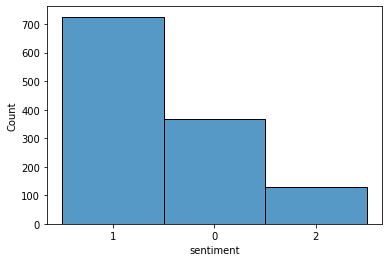

In [122]:
sns.histplot(data=labelled_data, x='sentiment')

## Data Processing

In [123]:
labelled_data['full_tweet_words_only'] = labelled_data['full_tweet']
unlabelled_data['full_tweet_words_only'] = unlabelled_data['tweet']

In [124]:
labelled_data

datetime                                         full_tweet  \
0     25/3/2022 23:54  The Tennessee Bureau of Investigation has issu...   
1     25/3/2022 23:53  TBI Issues Amber Alert for Franklin Child: htt...   
2     25/3/2022 23:51  @TBInvestigation @FranklinTNPD Why did it take...   
3     25/3/2022 23:47  ���� AMBER Alert ���� | TBI has issued an AMBE...   
4     25/3/2022 23:47  @TBInvestigation @FranklinTNPD I thought it wa...   
...               ...                                                ...   
1218  30/3/2022 21:32  @CityNewsVAN Why am I receiving an Amber Alert...   
1219  30/3/2022 20:53  @CityNewsVAN People who complain about the Amb...   
1220    1/4/2022 0:57  If you send a 200 decibel Amber Alert at 3am t...   
1221    1/4/2022 1:36  STOP calling 911 to complain about Amber Alert...   
1222   1/4/2022 21:50  After a 14-year-old went missing in March, an ...   

     sentiment                              full_tweet_words_only  
0            1  The Tennessee Bureau of Investigation has issu...  
1            1  TBI Issues Amber Alert for Franklin Child: htt...  
2            0  @TBInvestigation @FranklinTNPD Why did it take...  
3            1  ���� AMBER Alert ���� | TBI has issued an AMBE...  
4            0  @TBInvestigation @FranklinTNPD I thought it wa...  
...        ...                                                ...  
1218         0  @CityNewsVAN Why am I receiving an Amber Alert...  
1219         2  @CityNewsVAN People who complain about the Amb...  
1220         2  If you send a 200 decibel Amber Alert at 3am t...  
1221         2  STOP calling 911 to complain about Amber Alert...  
1222         1  After a 14-year-old went missing in March, an ...  

[1223 rows x 4 columns]

In [125]:
unlabelled_data

datetime                                              tweet  \
0     2022-03-28 23:55  THE FELON IS GENERALLY AN IMBECILE. IF HE COMM...   
1     2022-03-28 23:55  MINE CASE AND OPERATION BEGIN WITH TWO (2) AMB...   
2     2022-03-28 23:49  WE CROSSED THIS PERSON, MY KIDNAPPING BINDER-R...   
3     2022-03-28 23:42  14-Year-Old Girl Abducted by Sex Offender Fath...   
4     2022-03-28 23:24  Missing Tullahoma Boy With Autism Found, Amber...   
...                ...                                                ...   
1085    26/3/2022 0:06  b'@mehdirhasan # Amber Alert! For Merrick Garl...   
1086    26/3/2022 0:06  b'I was in Walmart today when they sent out an...   
1087    26/3/2022 0:04  b'Why did it take 1 whole month to put a Amber...   
1088    26/3/2022 0:03  b'AMBER ALERT: There is no known direction of ...   
1089    26/3/2022 0:02  b'Yet again my son calls me and I call him bac...   

                                  full_tweet_words_only  
0     THE FELON IS GENERALLY AN IMBECILE. IF HE COMM...  
1     MINE CASE AND OPERATION BEGIN WITH TWO (2) AMB...  
2     WE CROSSED THIS PERSON, MY KIDNAPPING BINDER-R...  
3     14-Year-Old Girl Abducted by Sex Offender Fath...  
4     Missing Tullahoma Boy With Autism Found, Amber...  
...                                                 ...  
1085  b'@mehdirhasan # Amber Alert! For Merrick Garl...  
1086  b'I was in Walmart today when they sent out an...  
1087  b'Why did it take 1 whole month to put a Amber...  
1088  b'AMBER ALERT: There is no known direction of ...  
1089  b'Yet again my son calls me and I call him bac...  

[1090 rows x 3 columns]

### Removes replies (@user), URLs (https://...) and hashtags (#hashtag), and change to lowercase

In [126]:
from pandas.core.common import temp_setattr
import re

patterns = ['http[^\s]*', '\@[A-Za-z0-9]*', '\#[A-Za-z0-9]*']

tweets_processed = []
for tweet in labelled_data.full_tweet_words_only:
  for pattern in patterns:
    tweet = re.sub(pattern, '', str(tweet))
  tweets_processed.append(tweet)
labelled_data.full_tweet_words_only = tweets_processed


labelled_data


datetime                                         full_tweet  \
0     25/3/2022 23:54  The Tennessee Bureau of Investigation has issu...   
1     25/3/2022 23:53  TBI Issues Amber Alert for Franklin Child: htt...   
2     25/3/2022 23:51  @TBInvestigation @FranklinTNPD Why did it take...   
3     25/3/2022 23:47  ���� AMBER Alert ���� | TBI has issued an AMBE...   
4     25/3/2022 23:47  @TBInvestigation @FranklinTNPD I thought it wa...   
...               ...                                                ...   
1218  30/3/2022 21:32  @CityNewsVAN Why am I receiving an Amber Alert...   
1219  30/3/2022 20:53  @CityNewsVAN People who complain about the Amb...   
1220    1/4/2022 0:57  If you send a 200 decibel Amber Alert at 3am t...   
1221    1/4/2022 1:36  STOP calling 911 to complain about Amber Alert...   
1222   1/4/2022 21:50  After a 14-year-old went missing in March, an ...   

     sentiment                              full_tweet_words_only  
0            1  The Tennessee Bureau of Investigation has issu...  
1            1        TBI Issues Amber Alert for Franklin Child:   
2            0    Why did it take also a month to issue and Am...  
3            1  ���� AMBER Alert ���� | TBI has issued an AMBE...  
4            0    I thought it was a mistake because it had be...  
...        ...                                                ...  
1218         0   Why am I receiving an Amber Alert for somethi...  
1219         2   People who complain about the Amber alert are...  
1220         2  If you send a 200 decibel Amber Alert at 3am t...  
1221         2  STOP calling 911 to complain about Amber Alert...  
1222         1  After a 14-year-old went missing in March, an ...  

[1223 rows x 4 columns]

In [127]:
tweets_processed = []
for tweet in unlabelled_data.full_tweet_words_only:
  for pattern in patterns:
    tweet = re.sub(pattern, '', str(tweet))
  tweets_processed.append(tweet)
unlabelled_data.full_tweet_words_only = tweets_processed


unlabelled_data

datetime                                              tweet  \
0     2022-03-28 23:55  THE FELON IS GENERALLY AN IMBECILE. IF HE COMM...   
1     2022-03-28 23:55  MINE CASE AND OPERATION BEGIN WITH TWO (2) AMB...   
2     2022-03-28 23:49  WE CROSSED THIS PERSON, MY KIDNAPPING BINDER-R...   
3     2022-03-28 23:42  14-Year-Old Girl Abducted by Sex Offender Fath...   
4     2022-03-28 23:24  Missing Tullahoma Boy With Autism Found, Amber...   
...                ...                                                ...   
1085    26/3/2022 0:06  b'@mehdirhasan # Amber Alert! For Merrick Garl...   
1086    26/3/2022 0:06  b'I was in Walmart today when they sent out an...   
1087    26/3/2022 0:04  b'Why did it take 1 whole month to put a Amber...   
1088    26/3/2022 0:03  b'AMBER ALERT: There is no known direction of ...   
1089    26/3/2022 0:02  b'Yet again my son calls me and I call him bac...   

                                  full_tweet_words_only  
0     THE FELON IS GENERALLY AN IMBECILE. IF HE COMM...  
1     MINE CASE AND OPERATION BEGIN WITH TWO (2) AMB...  
2     WE CROSSED THIS PERSON, MY KIDNAPPING BINDER-R...  
3     14-Year-Old Girl Abducted by Sex Offender Fath...  
4     Missing Tullahoma Boy With Autism Found, Amber...  
...                                                 ...  
1085              b'  Amber Alert! For Merrick Garland'  
1086  b'I was in Walmart today when they sent out an...  
1087  b'Why did it take 1 whole month to put a Amber...  
1088  b'AMBER ALERT: There is no known direction of ...  
1089  b'Yet again my son calls me and I call him bac...  

[1090 rows x 3 columns]

### Removes non-alphanumeric unicode characters, including punctuations

In [128]:
import string 

labelled_data['full_tweet_alphanumeric'] = labelled_data['full_tweet_words_only']
puncts = '[' + str(string.punctuation) + ']'

tweets_alphanumeric = []
for tweet in labelled_data.full_tweet_alphanumeric:
  tweet = re.sub(puncts, ' ', str(tweet))
  tweet = re.sub('[^A-Za-z0-9\s]', '', str(tweet))

  tweet = tweet.lower()
  tweets_alphanumeric.append(tweet)
labelled_data.full_tweet_alphanumeric = tweets_alphanumeric

labelled_data

datetime                                         full_tweet  \
0     25/3/2022 23:54  The Tennessee Bureau of Investigation has issu...   
1     25/3/2022 23:53  TBI Issues Amber Alert for Franklin Child: htt...   
2     25/3/2022 23:51  @TBInvestigation @FranklinTNPD Why did it take...   
3     25/3/2022 23:47  ���� AMBER Alert ���� | TBI has issued an AMBE...   
4     25/3/2022 23:47  @TBInvestigation @FranklinTNPD I thought it wa...   
...               ...                                                ...   
1218  30/3/2022 21:32  @CityNewsVAN Why am I receiving an Amber Alert...   
1219  30/3/2022 20:53  @CityNewsVAN People who complain about the Amb...   
1220    1/4/2022 0:57  If you send a 200 decibel Amber Alert at 3am t...   
1221    1/4/2022 1:36  STOP calling 911 to complain about Amber Alert...   
1222   1/4/2022 21:50  After a 14-year-old went missing in March, an ...   

     sentiment                              full_tweet_words_only  \
0            1  The Tennessee Bureau of Investigation has issu...   
1            1        TBI Issues Amber Alert for Franklin Child:    
2            0    Why did it take also a month to issue and Am...   
3            1  ���� AMBER Alert ���� | TBI has issued an AMBE...   
4            0    I thought it was a mistake because it had be...   
...        ...                                                ...   
1218         0   Why am I receiving an Amber Alert for somethi...   
1219         2   People who complain about the Amber alert are...   
1220         2  If you send a 200 decibel Amber Alert at 3am t...   
1221         2  STOP calling 911 to complain about Amber Alert...   
1222         1  After a 14-year-old went missing in March, an ...   

                                full_tweet_alphanumeric  
0     the tennessee bureau of investigation has issu...  
1           tbi issues amber alert for franklin child    
2       why did it take also a month to issue and am...  
3      amber alert    tbi has issued an amber alert ...  
4       i thought it was a mistake because it had be...  
...                                                 ...  
1218   why am i receiving an amber alert for somethi...  
1219   people who complain about the amber alert are...  
1220  if you send a 200 decibel amber alert at 3am t...  
1221  stop calling 911 to complain about amber alert...  
1222  after a 14 year old went missing in march  an ...  

[1223 rows x 5 columns]

In [129]:
unlabelled_data['full_tweet_alphanumeric'] = unlabelled_data['full_tweet_words_only']

tweets_alphanumeric = []
for tweet in unlabelled_data.full_tweet_alphanumeric:
  tweet = re.sub(puncts, ' ', str(tweet))
  tweet = re.sub('[^A-Za-z0-9\s]', '', str(tweet))

  tweet = tweet.lower()
  tweets_alphanumeric.append(tweet)
unlabelled_data.full_tweet_alphanumeric = tweets_alphanumeric

unlabelled_data

datetime                                              tweet  \
0     2022-03-28 23:55  THE FELON IS GENERALLY AN IMBECILE. IF HE COMM...   
1     2022-03-28 23:55  MINE CASE AND OPERATION BEGIN WITH TWO (2) AMB...   
2     2022-03-28 23:49  WE CROSSED THIS PERSON, MY KIDNAPPING BINDER-R...   
3     2022-03-28 23:42  14-Year-Old Girl Abducted by Sex Offender Fath...   
4     2022-03-28 23:24  Missing Tullahoma Boy With Autism Found, Amber...   
...                ...                                                ...   
1085    26/3/2022 0:06  b'@mehdirhasan # Amber Alert! For Merrick Garl...   
1086    26/3/2022 0:06  b'I was in Walmart today when they sent out an...   
1087    26/3/2022 0:04  b'Why did it take 1 whole month to put a Amber...   
1088    26/3/2022 0:03  b'AMBER ALERT: There is no known direction of ...   
1089    26/3/2022 0:02  b'Yet again my son calls me and I call him bac...   

                                  full_tweet_words_only  \
0     THE FELON IS GENERALLY AN IMBECILE. IF HE COMM...   
1     MINE CASE AND OPERATION BEGIN WITH TWO (2) AMB...   
2     WE CROSSED THIS PERSON, MY KIDNAPPING BINDER-R...   
3     14-Year-Old Girl Abducted by Sex Offender Fath...   
4     Missing Tullahoma Boy With Autism Found, Amber...   
...                                                 ...   
1085              b'  Amber Alert! For Merrick Garland'   
1086  b'I was in Walmart today when they sent out an...   
1087  b'Why did it take 1 whole month to put a Amber...   
1088  b'AMBER ALERT: There is no known direction of ...   
1089  b'Yet again my son calls me and I call him bac...   

                                full_tweet_alphanumeric  
0     the felon is generally an imbecile  if he comm...  
1     mine case and operation begin with two  2  amb...  
2     we crossed this person  my kidnapping binder r...  
3     14 year old girl abducted by sex offender fath...  
4     missing tullahoma boy with autism found  amber...  
...                                                 ...  
1085              b   amber alert  for merrick garland   
1086  b i was in walmart today when they sent out an...  
1087  b why did it take 1 whole month to put a amber...  
1088  b amber alert  there is no known direction of ...  
1089  b yet again my son calls me and i call him bac...  

[1090 rows x 4 columns]

### Tokenize the processed tweets

In [130]:
labelled_data['tokens'] = labelled_data['full_tweet_alphanumeric'].str.split()
labelled_data

datetime                                         full_tweet  \
0     25/3/2022 23:54  The Tennessee Bureau of Investigation has issu...   
1     25/3/2022 23:53  TBI Issues Amber Alert for Franklin Child: htt...   
2     25/3/2022 23:51  @TBInvestigation @FranklinTNPD Why did it take...   
3     25/3/2022 23:47  ���� AMBER Alert ���� | TBI has issued an AMBE...   
4     25/3/2022 23:47  @TBInvestigation @FranklinTNPD I thought it wa...   
...               ...                                                ...   
1218  30/3/2022 21:32  @CityNewsVAN Why am I receiving an Amber Alert...   
1219  30/3/2022 20:53  @CityNewsVAN People who complain about the Amb...   
1220    1/4/2022 0:57  If you send a 200 decibel Amber Alert at 3am t...   
1221    1/4/2022 1:36  STOP calling 911 to complain about Amber Alert...   
1222   1/4/2022 21:50  After a 14-year-old went missing in March, an ...   

     sentiment                              full_tweet_words_only  \
0            1  The Tennessee Bureau of Investigation has issu...   
1            1        TBI Issues Amber Alert for Franklin Child:    
2            0    Why did it take also a month to issue and Am...   
3            1  ���� AMBER Alert ���� | TBI has issued an AMBE...   
4            0    I thought it was a mistake because it had be...   
...        ...                                                ...   
1218         0   Why am I receiving an Amber Alert for somethi...   
1219         2   People who complain about the Amber alert are...   
1220         2  If you send a 200 decibel Amber Alert at 3am t...   
1221         2  STOP calling 911 to complain about Amber Alert...   
1222         1  After a 14-year-old went missing in March, an ...   

                                full_tweet_alphanumeric  \
0     the tennessee bureau of investigation has issu...   
1           tbi issues amber alert for franklin child     
2       why did it take also a month to issue and am...   
3      amber alert    tbi has issued an amber alert ...   
4       i thought it was a mistake because it had be...   
...                                                 ...   
1218   why am i receiving an amber alert for somethi...   
1219   people who complain about the amber alert are...   
1220  if you send a 200 decibel amber alert at 3am t...   
1221  stop calling 911 to complain about amber alert...   
1222  after a 14 year old went missing in march  an ...   

                                                 tokens  
0     [the, tennessee, bureau, of, investigation, ha...  
1     [tbi, issues, amber, alert, for, franklin, child]  
2     [why, did, it, take, also, a, month, to, issue...  
3     [amber, alert, tbi, has, issued, an, amber, al...  
4     [i, thought, it, was, a, mistake, because, it,...  
...                                                 ...  
1218  [why, am, i, receiving, an, amber, alert, for,...  
1219  [people, who, complain, about, the, amber, ale...  
1220  [if, you, send, a, 200, decibel, amber, alert,...  
1221  [stop, calling, 911, to, complain, about, ambe...  
1222  [after, a, 14, year, old, went, missing, in, m...  

[1223 rows x 6 columns]

In [131]:
unlabelled_data['tokens'] = unlabelled_data['full_tweet_alphanumeric'].str.split()
unlabelled_data

datetime                                              tweet  \
0     2022-03-28 23:55  THE FELON IS GENERALLY AN IMBECILE. IF HE COMM...   
1     2022-03-28 23:55  MINE CASE AND OPERATION BEGIN WITH TWO (2) AMB...   
2     2022-03-28 23:49  WE CROSSED THIS PERSON, MY KIDNAPPING BINDER-R...   
3     2022-03-28 23:42  14-Year-Old Girl Abducted by Sex Offender Fath...   
4     2022-03-28 23:24  Missing Tullahoma Boy With Autism Found, Amber...   
...                ...                                                ...   
1085    26/3/2022 0:06  b'@mehdirhasan # Amber Alert! For Merrick Garl...   
1086    26/3/2022 0:06  b'I was in Walmart today when they sent out an...   
1087    26/3/2022 0:04  b'Why did it take 1 whole month to put a Amber...   
1088    26/3/2022 0:03  b'AMBER ALERT: There is no known direction of ...   
1089    26/3/2022 0:02  b'Yet again my son calls me and I call him bac...   

                                  full_tweet_words_only  \
0     THE FELON IS GENERALLY AN IMBECILE. IF HE COMM...   
1     MINE CASE AND OPERATION BEGIN WITH TWO (2) AMB...   
2     WE CROSSED THIS PERSON, MY KIDNAPPING BINDER-R...   
3     14-Year-Old Girl Abducted by Sex Offender Fath...   
4     Missing Tullahoma Boy With Autism Found, Amber...   
...                                                 ...   
1085              b'  Amber Alert! For Merrick Garland'   
1086  b'I was in Walmart today when they sent out an...   
1087  b'Why did it take 1 whole month to put a Amber...   
1088  b'AMBER ALERT: There is no known direction of ...   
1089  b'Yet again my son calls me and I call him bac...   

                                full_tweet_alphanumeric  \
0     the felon is generally an imbecile  if he comm...   
1     mine case and operation begin with two  2  amb...   
2     we crossed this person  my kidnapping binder r...   
3     14 year old girl abducted by sex offender fath...   
4     missing tullahoma boy with autism found  amber...   
...                                                 ...   
1085              b   amber alert  for merrick garland    
1086  b i was in walmart today when they sent out an...   
1087  b why did it take 1 whole month to put a amber...   
1088  b amber alert  there is no known direction of ...   
1089  b yet again my son calls me and i call him bac...   

                                                 tokens  
0     [the, felon, is, generally, an, imbecile, if, ...  
1     [mine, case, and, operation, begin, with, two,...  
2     [we, crossed, this, person, my, kidnapping, bi...  
3     [14, year, old, girl, abducted, by, sex, offen...  
4     [missing, tullahoma, boy, with, autism, found,...  
...                                                 ...  
1085           [b, amber, alert, for, merrick, garland]  
1086  [b, i, was, in, walmart, today, when, they, se...  
1087  [b, why, did, it, take, 1, whole, month, to, p...  
1088  [b, amber, alert, there, is, no, known, direct...  
1089  [b, yet, again, my, son, calls, me, and, i, ca...  

[1090 rows x 5 columns]

### Remove stopwords

In [132]:
nltk.download('stopwords')
sw = stopwords.words('english')[:200]

new_tokens = []
for row in labelled_data['tokens']:
  new_row = []
  for item in row:
    if item not in sw:
      new_row.append(item)
  new_tokens.append(new_row)

labelled_data['tokens_no_sw'] = new_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [133]:
labelled_data

datetime                                         full_tweet  \
0     25/3/2022 23:54  The Tennessee Bureau of Investigation has issu...   
1     25/3/2022 23:53  TBI Issues Amber Alert for Franklin Child: htt...   
2     25/3/2022 23:51  @TBInvestigation @FranklinTNPD Why did it take...   
3     25/3/2022 23:47  ���� AMBER Alert ���� | TBI has issued an AMBE...   
4     25/3/2022 23:47  @TBInvestigation @FranklinTNPD I thought it wa...   
...               ...                                                ...   
1218  30/3/2022 21:32  @CityNewsVAN Why am I receiving an Amber Alert...   
1219  30/3/2022 20:53  @CityNewsVAN People who complain about the Amb...   
1220    1/4/2022 0:57  If you send a 200 decibel Amber Alert at 3am t...   
1221    1/4/2022 1:36  STOP calling 911 to complain about Amber Alert...   
1222   1/4/2022 21:50  After a 14-year-old went missing in March, an ...   

     sentiment                              full_tweet_words_only  \
0            1  The Tennessee Bureau of Investigation has issu...   
1            1        TBI Issues Amber Alert for Franklin Child:    
2            0    Why did it take also a month to issue and Am...   
3            1  ���� AMBER Alert ���� | TBI has issued an AMBE...   
4            0    I thought it was a mistake because it had be...   
...        ...                                                ...   
1218         0   Why am I receiving an Amber Alert for somethi...   
1219         2   People who complain about the Amber alert are...   
1220         2  If you send a 200 decibel Amber Alert at 3am t...   
1221         2  STOP calling 911 to complain about Amber Alert...   
1222         1  After a 14-year-old went missing in March, an ...   

                                full_tweet_alphanumeric  \
0     the tennessee bureau of investigation has issu...   
1           tbi issues amber alert for franklin child     
2       why did it take also a month to issue and am...   
3      amber alert    tbi has issued an amber alert ...   
4       i thought it was a mistake because it had be...   
...                                                 ...   
1218   why am i receiving an amber alert for somethi...   
1219   people who complain about the amber alert are...   
1220  if you send a 200 decibel amber alert at 3am t...   
1221  stop calling 911 to complain about amber alert...   
1222  after a 14 year old went missing in march  an ...   

                                                 tokens  \
0     [the, tennessee, bureau, of, investigation, ha...   
1     [tbi, issues, amber, alert, for, franklin, child]   
2     [why, did, it, take, also, a, month, to, issue...   
3     [amber, alert, tbi, has, issued, an, amber, al...   
4     [i, thought, it, was, a, mistake, because, it,...   
...                                                 ...   
1218  [why, am, i, receiving, an, amber, alert, for,...   
1219  [people, who, complain, about, the, amber, ale...   
1220  [if, you, send, a, 200, decibel, amber, alert,...   
1221  [stop, calling, 911, to, complain, about, ambe...   
1222  [after, a, 14, year, old, went, missing, in, m...   

                                           tokens_no_sw  
0     [tennessee, bureau, investigation, issued, amb...  
1          [tbi, issues, amber, alert, franklin, child]  
2     [take, also, month, issue, amber, alert, duh, ...  
3     [amber, alert, tbi, issued, amber, alert, one,...  
4     [thought, mistake, long, race, related, said, ...  
...                                                 ...  
1218  [receiving, amber, alert, something, 1k, km, a...  
1219  [people, complain, amber, alert, people, compl...  
1220  [send, 200, decibel, amber, alert, 3am, wakes,...  
1221  [stop, calling, 911, complain, amber, alerts, ...  
1222  [14, year, old, went, missing, march, amber, a...  

[1223 rows x 7 columns]

In [134]:
new_tokens = []
for row in unlabelled_data['tokens']:
  new_row = []
  for item in row:
    if item not in sw:
      new_row.append(item)
  new_tokens.append(new_row)

unlabelled_data['tokens_no_sw'] = new_tokens

In [135]:
unlabelled_data

datetime                                              tweet  \
0     2022-03-28 23:55  THE FELON IS GENERALLY AN IMBECILE. IF HE COMM...   
1     2022-03-28 23:55  MINE CASE AND OPERATION BEGIN WITH TWO (2) AMB...   
2     2022-03-28 23:49  WE CROSSED THIS PERSON, MY KIDNAPPING BINDER-R...   
3     2022-03-28 23:42  14-Year-Old Girl Abducted by Sex Offender Fath...   
4     2022-03-28 23:24  Missing Tullahoma Boy With Autism Found, Amber...   
...                ...                                                ...   
1085    26/3/2022 0:06  b'@mehdirhasan # Amber Alert! For Merrick Garl...   
1086    26/3/2022 0:06  b'I was in Walmart today when they sent out an...   
1087    26/3/2022 0:04  b'Why did it take 1 whole month to put a Amber...   
1088    26/3/2022 0:03  b'AMBER ALERT: There is no known direction of ...   
1089    26/3/2022 0:02  b'Yet again my son calls me and I call him bac...   

                                  full_tweet_words_only  \
0     THE FELON IS GENERALLY AN IMBECILE. IF HE COMM...   
1     MINE CASE AND OPERATION BEGIN WITH TWO (2) AMB...   
2     WE CROSSED THIS PERSON, MY KIDNAPPING BINDER-R...   
3     14-Year-Old Girl Abducted by Sex Offender Fath...   
4     Missing Tullahoma Boy With Autism Found, Amber...   
...                                                 ...   
1085              b'  Amber Alert! For Merrick Garland'   
1086  b'I was in Walmart today when they sent out an...   
1087  b'Why did it take 1 whole month to put a Amber...   
1088  b'AMBER ALERT: There is no known direction of ...   
1089  b'Yet again my son calls me and I call him bac...   

                                full_tweet_alphanumeric  \
0     the felon is generally an imbecile  if he comm...   
1     mine case and operation begin with two  2  amb...   
2     we crossed this person  my kidnapping binder r...   
3     14 year old girl abducted by sex offender fath...   
4     missing tullahoma boy with autism found  amber...   
...                                                 ...   
1085              b   amber alert  for merrick garland    
1086  b i was in walmart today when they sent out an...   
1087  b why did it take 1 whole month to put a amber...   
1088  b amber alert  there is no known direction of ...   
1089  b yet again my son calls me and i call him bac...   

                                                 tokens  \
0     [the, felon, is, generally, an, imbecile, if, ...   
1     [mine, case, and, operation, begin, with, two,...   
2     [we, crossed, this, person, my, kidnapping, bi...   
3     [14, year, old, girl, abducted, by, sex, offen...   
4     [missing, tullahoma, boy, with, autism, found,...   
...                                                 ...   
1085           [b, amber, alert, for, merrick, garland]   
1086  [b, i, was, in, walmart, today, when, they, se...   
1087  [b, why, did, it, take, 1, whole, month, to, p...   
1088  [b, amber, alert, there, is, no, known, direct...   
1089  [b, yet, again, my, son, calls, me, and, i, ca...   

                                           tokens_no_sw  
0     [felon, generally, imbecile, commits, crime, b...  
1     [mine, case, operation, begin, two, 2, amber, ...  
2     [crossed, person, kidnapping, binder, retrieva...  
3     [14, year, old, girl, abducted, sex, offender,...  
4     [missing, tullahoma, boy, autism, found, amber...  
...                                                 ...  
1085                [b, amber, alert, merrick, garland]  
1086  [b, walmart, today, sent, amber, alert, produc...  
1087  [b, take, 1, whole, month, put, amber, alert, ...  
1088  [b, amber, alert, known, direction, travel, tb...  
1089  [b, yet, son, calls, call, back, says, xe2x80x...  

[1090 rows x 6 columns]

### Stem the tokens

In [136]:
#### Stemming tokens ####
stemmer = PorterStemmer()
stemmed_tokens = []

for row in labelled_data['tokens_no_sw']:
  stemmed_row = []
  for item in row:
    token_stems = stemmer.stem(item)
    stemmed_row.append(token_stems)
  stemmed_tokens.append(stemmed_row)

labelled_data['tokens_stemmed'] = stemmed_tokens

In [137]:
labelled_data

datetime                                         full_tweet  \
0     25/3/2022 23:54  The Tennessee Bureau of Investigation has issu...   
1     25/3/2022 23:53  TBI Issues Amber Alert for Franklin Child: htt...   
2     25/3/2022 23:51  @TBInvestigation @FranklinTNPD Why did it take...   
3     25/3/2022 23:47  ���� AMBER Alert ���� | TBI has issued an AMBE...   
4     25/3/2022 23:47  @TBInvestigation @FranklinTNPD I thought it wa...   
...               ...                                                ...   
1218  30/3/2022 21:32  @CityNewsVAN Why am I receiving an Amber Alert...   
1219  30/3/2022 20:53  @CityNewsVAN People who complain about the Amb...   
1220    1/4/2022 0:57  If you send a 200 decibel Amber Alert at 3am t...   
1221    1/4/2022 1:36  STOP calling 911 to complain about Amber Alert...   
1222   1/4/2022 21:50  After a 14-year-old went missing in March, an ...   

     sentiment                              full_tweet_words_only  \
0            1  The Tennessee Bureau of Investigation has issu...   
1            1        TBI Issues Amber Alert for Franklin Child:    
2            0    Why did it take also a month to issue and Am...   
3            1  ���� AMBER Alert ���� | TBI has issued an AMBE...   
4            0    I thought it was a mistake because it had be...   
...        ...                                                ...   
1218         0   Why am I receiving an Amber Alert for somethi...   
1219         2   People who complain about the Amber alert are...   
1220         2  If you send a 200 decibel Amber Alert at 3am t...   
1221         2  STOP calling 911 to complain about Amber Alert...   
1222         1  After a 14-year-old went missing in March, an ...   

                                full_tweet_alphanumeric  \
0     the tennessee bureau of investigation has issu...   
1           tbi issues amber alert for franklin child     
2       why did it take also a month to issue and am...   
3      amber alert    tbi has issued an amber alert ...   
4       i thought it was a mistake because it had be...   
...                                                 ...   
1218   why am i receiving an amber alert for somethi...   
1219   people who complain about the amber alert are...   
1220  if you send a 200 decibel amber alert at 3am t...   
1221  stop calling 911 to complain about amber alert...   
1222  after a 14 year old went missing in march  an ...   

                                                 tokens  \
0     [the, tennessee, bureau, of, investigation, ha...   
1     [tbi, issues, amber, alert, for, franklin, child]   
2     [why, did, it, take, also, a, month, to, issue...   
3     [amber, alert, tbi, has, issued, an, amber, al...   
4     [i, thought, it, was, a, mistake, because, it,...   
...                                                 ...   
1218  [why, am, i, receiving, an, amber, alert, for,...   
1219  [people, who, complain, about, the, amber, ale...   
1220  [if, you, send, a, 200, decibel, amber, alert,...   
1221  [stop, calling, 911, to, complain, about, ambe...   
1222  [after, a, 14, year, old, went, missing, in, m...   

                                           tokens_no_sw  \
0     [tennessee, bureau, investigation, issued, amb...   
1          [tbi, issues, amber, alert, franklin, child]   
2     [take, also, month, issue, amber, alert, duh, ...   
3     [amber, alert, tbi, issued, amber, alert, one,...   
4     [thought, mistake, long, race, related, said, ...   
...                                                 ...   
1218  [receiving, amber, alert, something, 1k, km, a...   
1219  [people, complain, amber, alert, people, compl...   
1220  [send, 200, decibel, amber, alert, 3am, wakes,...   
1221  [stop, calling, 911, complain, amber, alerts, ...   
1222  [14, year, old, went, missing, march, amber, a...   

                                         tokens_stemmed  
0     [tennesse, bureau, investig, issu, amber, aler...  
1            [tbi, issu, amb

In [138]:
#### Stemming tokens ####
stemmer = PorterStemmer()
stemmed_tokens = []

for row in unlabelled_data['tokens_no_sw']:
  stemmed_row = []
  for item in row:
    token_stems = stemmer.stem(item)
    stemmed_row.append(token_stems)
  stemmed_tokens.append(stemmed_row)

unlabelled_data['tokens_stemmed'] = stemmed_tokens

In [139]:
unlabelled_data

datetime                                              tweet  \
0     2022-03-28 23:55  THE FELON IS GENERALLY AN IMBECILE. IF HE COMM...   
1     2022-03-28 23:55  MINE CASE AND OPERATION BEGIN WITH TWO (2) AMB...   
2     2022-03-28 23:49  WE CROSSED THIS PERSON, MY KIDNAPPING BINDER-R...   
3     2022-03-28 23:42  14-Year-Old Girl Abducted by Sex Offender Fath...   
4     2022-03-28 23:24  Missing Tullahoma Boy With Autism Found, Amber...   
...                ...                                                ...   
1085    26/3/2022 0:06  b'@mehdirhasan # Amber Alert! For Merrick Garl...   
1086    26/3/2022 0:06  b'I was in Walmart today when they sent out an...   
1087    26/3/2022 0:04  b'Why did it take 1 whole month to put a Amber...   
1088    26/3/2022 0:03  b'AMBER ALERT: There is no known direction of ...   
1089    26/3/2022 0:02  b'Yet again my son calls me and I call him bac...   

                                  full_tweet_words_only  \
0     THE FELON IS GENERALLY AN IMBECILE. IF HE COMM...   
1     MINE CASE AND OPERATION BEGIN WITH TWO (2) AMB...   
2     WE CROSSED THIS PERSON, MY KIDNAPPING BINDER-R...   
3     14-Year-Old Girl Abducted by Sex Offender Fath...   
4     Missing Tullahoma Boy With Autism Found, Amber...   
...                                                 ...   
1085              b'  Amber Alert! For Merrick Garland'   
1086  b'I was in Walmart today when they sent out an...   
1087  b'Why did it take 1 whole month to put a Amber...   
1088  b'AMBER ALERT: There is no known direction of ...   
1089  b'Yet again my son calls me and I call him bac...   

                                full_tweet_alphanumeric  \
0     the felon is generally an imbecile  if he comm...   
1     mine case and operation begin with two  2  amb...   
2     we crossed this person  my kidnapping binder r...   
3     14 year old girl abducted by sex offender fath...   
4     missing tullahoma boy with autism found  amber...   
...                                                 ...   
1085              b   amber alert  for merrick garland    
1086  b i was in walmart today when they sent out an...   
1087  b why did it take 1 whole month to put a amber...   
1088  b amber alert  there is no known direction of ...   
1089  b yet again my son calls me and i call him bac...   

                                                 tokens  \
0     [the, felon, is, generally, an, imbecile, if, ...   
1     [mine, case, and, operation, begin, with, two,...   
2     [we, crossed, this, person, my, kidnapping, bi...   
3     [14, year, old, girl, abducted, by, sex, offen...   
4     [missing, tullahoma, boy, with, autism, found,...   
...                                                 ...   
1085           [b, amber, alert, for, merrick, garland]   
1086  [b, i, was, in, walmart, today, when, they, se...   
1087  [b, why, did, it, take, 1, whole, month, to, p...   
1088  [b, amber, alert, there, is, no, known, direct...   
1089  [b, yet, again, my, son, calls, me, and, i, ca...   

                                           tokens_no_sw  \
0     [felon, generally, imbecile, commits, crime, b...   
1     [mine, case, operation, begin, two, 2, amber, ...   
2     [crossed, person, kidnapping, binder, retrieva...   
3     [14, year, old, girl, abducted, sex, offender,...   
4     [missing, tullahoma, boy, autism, found, amber...   
...                                                 ...   
1085                [b, amber, alert, merrick, garland]   
1086  [b, walmart, today, sent, amber, alert, produc...   
1087  [b, take, 1, whole, month, put, amber, alert, ...   
1088  [b, amber, alert, known, direction, travel, tb...   
1089  [b, yet, son, calls, call, back, says, xe2x80x...   

                                         tokens_stemmed  
0     [felon, gener, imbecil, commit, crime, b, esca...  
1     [mine, case, oper, begin, two, 2, amber, alert...  
2     [cross, person, kidnap, binder, retriev, amp, ...  
3     [14, year, old,

### Lemmatize the tokens

In [140]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

lemma_tokens = []

for row in labelled_data['tokens_no_sw']:
  lemma_row = []
  for item in row:
    lemma_token = lemmatizer.lemmatize(item)
    lemma_row.append(lemma_token)
  lemma_tokens.append(lemma_row)

labelled_data['lemma_tokens'] = lemma_tokens

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [141]:
labelled_data

datetime                                         full_tweet  \
0     25/3/2022 23:54  The Tennessee Bureau of Investigation has issu...   
1     25/3/2022 23:53  TBI Issues Amber Alert for Franklin Child: htt...   
2     25/3/2022 23:51  @TBInvestigation @FranklinTNPD Why did it take...   
3     25/3/2022 23:47  ���� AMBER Alert ���� | TBI has issued an AMBE...   
4     25/3/2022 23:47  @TBInvestigation @FranklinTNPD I thought it wa...   
...               ...                                                ...   
1218  30/3/2022 21:32  @CityNewsVAN Why am I receiving an Amber Alert...   
1219  30/3/2022 20:53  @CityNewsVAN People who complain about the Amb...   
1220    1/4/2022 0:57  If you send a 200 decibel Amber Alert at 3am t...   
1221    1/4/2022 1:36  STOP calling 911 to complain about Amber Alert...   
1222   1/4/2022 21:50  After a 14-year-old went missing in March, an ...   

     sentiment                              full_tweet_words_only  \
0            1  The Tennessee Bureau of Investigation has issu...   
1            1        TBI Issues Amber Alert for Franklin Child:    
2            0    Why did it take also a month to issue and Am...   
3            1  ���� AMBER Alert ���� | TBI has issued an AMBE...   
4            0    I thought it was a mistake because it had be...   
...        ...                                                ...   
1218         0   Why am I receiving an Amber Alert for somethi...   
1219         2   People who complain about the Amber alert are...   
1220         2  If you send a 200 decibel Amber Alert at 3am t...   
1221         2  STOP calling 911 to complain about Amber Alert...   
1222         1  After a 14-year-old went missing in March, an ...   

                                full_tweet_alphanumeric  \
0     the tennessee bureau of investigation has issu...   
1           tbi issues amber alert for franklin child     
2       why did it take also a month to issue and am...   
3      amber alert    tbi has issued an amber alert ...   
4       i thought it was a mistake because it had be...   
...                                                 ...   
1218   why am i receiving an amber alert for somethi...   
1219   people who complain about the amber alert are...   
1220  if you send a 200 decibel amber alert at 3am t...   
1221  stop calling 911 to complain about amber alert...   
1222  after a 14 year old went missing in march  an ...   

                                                 tokens  \
0     [the, tennessee, bureau, of, investigation, ha...   
1     [tbi, issues, amber, alert, for, franklin, child]   
2     [why, did, it, take, also, a, month, to, issue...   
3     [amber, alert, tbi, has, issued, an, amber, al...   
4     [i, thought, it, was, a, mistake, because, it,...   
...                                                 ...   
1218  [why, am, i, receiving, an, amber, alert, for,...   
1219  [people, who, complain, about, the, amber, ale...   
1220  [if, you, send, a, 200, decibel, amber, alert,...   
1221  [stop, calling, 911, to, complain, about, ambe...   
1222  [after, a, 14, year, old, went, missing, in, m...   

                                           tokens_no_sw  \
0     [tennessee, bureau, investigation, issued, amb...   
1          [tbi, issues, amber, alert, franklin, child]   
2     [take, also, month, issue, amber, alert, duh, ...   
3     [amber, alert, tbi, issued, amber, alert, one,...   
4     [thought, mistake, long, race, related, said, ...   
...                                                 ...   
1218  [receiving, amber, alert, something, 1k, km, a...   
1219  [people, complain, amber, alert, people, compl...   
1220  [send, 200, decibel, amber, alert, 3am, wakes,...   
1221  [stop, calling, 911, complain, amber, alerts, ...   
1222  [14, year, old, went, missing, march, amber, a...   

                                         tokens_stemmed  \
0     [tennesse, bureau, investig, issu, amber, aler...   
1            [tbi, issu, a

In [142]:
lemmatizer = WordNetLemmatizer()

lemma_tokens = []

for row in unlabelled_data['tokens_no_sw']:
  lemma_row = []
  for item in row:
    lemma_token = lemmatizer.lemmatize(item)
    lemma_row.append(lemma_token)
  lemma_tokens.append(lemma_row)

unlabelled_data['lemma_tokens'] = lemma_tokens

In [143]:
unlabelled_data

datetime                                              tweet  \
0     2022-03-28 23:55  THE FELON IS GENERALLY AN IMBECILE. IF HE COMM...   
1     2022-03-28 23:55  MINE CASE AND OPERATION BEGIN WITH TWO (2) AMB...   
2     2022-03-28 23:49  WE CROSSED THIS PERSON, MY KIDNAPPING BINDER-R...   
3     2022-03-28 23:42  14-Year-Old Girl Abducted by Sex Offender Fath...   
4     2022-03-28 23:24  Missing Tullahoma Boy With Autism Found, Amber...   
...                ...                                                ...   
1085    26/3/2022 0:06  b'@mehdirhasan # Amber Alert! For Merrick Garl...   
1086    26/3/2022 0:06  b'I was in Walmart today when they sent out an...   
1087    26/3/2022 0:04  b'Why did it take 1 whole month to put a Amber...   
1088    26/3/2022 0:03  b'AMBER ALERT: There is no known direction of ...   
1089    26/3/2022 0:02  b'Yet again my son calls me and I call him bac...   

                                  full_tweet_words_only  \
0     THE FELON IS GENERALLY AN IMBECILE. IF HE COMM...   
1     MINE CASE AND OPERATION BEGIN WITH TWO (2) AMB...   
2     WE CROSSED THIS PERSON, MY KIDNAPPING BINDER-R...   
3     14-Year-Old Girl Abducted by Sex Offender Fath...   
4     Missing Tullahoma Boy With Autism Found, Amber...   
...                                                 ...   
1085              b'  Amber Alert! For Merrick Garland'   
1086  b'I was in Walmart today when they sent out an...   
1087  b'Why did it take 1 whole month to put a Amber...   
1088  b'AMBER ALERT: There is no known direction of ...   
1089  b'Yet again my son calls me and I call him bac...   

                                full_tweet_alphanumeric  \
0     the felon is generally an imbecile  if he comm...   
1     mine case and operation begin with two  2  amb...   
2     we crossed this person  my kidnapping binder r...   
3     14 year old girl abducted by sex offender fath...   
4     missing tullahoma boy with autism found  amber...   
...                                                 ...   
1085              b   amber alert  for merrick garland    
1086  b i was in walmart today when they sent out an...   
1087  b why did it take 1 whole month to put a amber...   
1088  b amber alert  there is no known direction of ...   
1089  b yet again my son calls me and i call him bac...   

                                                 tokens  \
0     [the, felon, is, generally, an, imbecile, if, ...   
1     [mine, case, and, operation, begin, with, two,...   
2     [we, crossed, this, person, my, kidnapping, bi...   
3     [14, year, old, girl, abducted, by, sex, offen...   
4     [missing, tullahoma, boy, with, autism, found,...   
...                                                 ...   
1085           [b, amber, alert, for, merrick, garland]   
1086  [b, i, was, in, walmart, today, when, they, se...   
1087  [b, why, did, it, take, 1, whole, month, to, p...   
1088  [b, amber, alert, there, is, no, known, direct...   
1089  [b, yet, again, my, son, calls, me, and, i, ca...   

                                           tokens_no_sw  \
0     [felon, generally, imbecile, commits, crime, b...   
1     [mine, case, operation, begin, two, 2, amber, ...   
2     [crossed, person, kidnapping, binder, retrieva...   
3     [14, year, old, girl, abducted, sex, offender,...   
4     [missing, tullahoma, boy, autism, found, amber...   
...                                                 ...   
1085                [b, amber, alert, merrick, garland]   
1086  [b, walmart, today, sent, amber, alert, produc...   
1087  [b, take, 1, whole, month, put, amber, alert, ...   
1088  [b, amber, alert, known, direction, travel, tb...   
1089  [b, yet, son, calls, call, back, says, xe2x80x...   

                                         tokens_stemmed  \
0     [felon, gener, imbecil, commit, crime, b, esca...   
1     [mine, case, oper, begin, two, 2, amber, alert...   
2     [cross, person, kidnap, binder, retriev, amp, ...   
3     [14, year, 

## Naive Bayes Model

### Using stemmed tokens

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
X_stemmed, y_stemmed = labelled_data['tokens_stemmed'].to_numpy(), labelled_data['sentiment'].to_numpy()

def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

count_vec = TfidfVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 2000)

stemmed_counts = count_vec.fit_transform(X_stemmed)
print(stemmed_counts.toarray())
stemmed_counts_arr = stemmed_counts.toarray()

print(count_vec.vocabulary_)
len(count_vec.vocabulary_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{'tennesse': 1714, 'bureau': 342, 'investig': 889, 'issu': 894, 'amber': 176, 'alert': 159, 'miss': 1089, 'one': 1201, 'year': 1979, 'old': 1195, 'child': 405, 'franklin': 767, 'tbi': 1702, 'take': 1695, 'also': 170, 'month': 1101, 'duh': 637, 'what': 1919, 'gone': 796, 'sinc': 1567, 'februari': 736, '27th': 55, 'agent': 145, 'believ': 277, 'aziah': 247, 'lumpkin': 1015, 'may': 1049, 'non': 1157, 'custodi': 524, 'father': 732, 'sharl': 1540, 'thought': 1736, 'mistak': 1092, 'long': 1000, 'race': 1363, 'relat': 1407, 'said': 1476, 'descript': 574, 'tnpd': 1755, 'request': 1419, 'assist': 226, 'today': 1756, 'tn': 1754, 'look': 1002, 'previou': 1319, 'made': 1021, 'white': 1925, 'children': 407, 'post': 1299, 'within': 1946, 'day': 545, 'yet': 1983, 'took': 1764, 'black': 293, 'babi': 250, 'boy': 314, 'racial': 1364, 'injustic': 880, 

2000

In [145]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets

X_stemmed_train, X_stemmed_test, y_stemmed_train, y_stemmed_test = train_test_split(stemmed_counts_arr, y_stemmed, test_size = 0.2, random_state = 42)

# First three rows of training features and labels
print('First 3 features:\n',X_stemmed_train[:3])
print('First 3 labels:\n',y_stemmed_train[:3])

First 3 features:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 3 labels:
 ['1' '0' '1']


In [146]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt

# Let's fit the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X_stemmed_train, y_stemmed_train)
# Predict on test data
y_stemmed_preds = nb.predict(X_stemmed_test)

print('Train accuracy with simple Naive Bayes:',accuracy_score(y_stemmed_train,nb.predict(X_stemmed_train)))
print('Test accuracy with simple Naive Bayes:',accuracy_score(y_stemmed_test,y_stemmed_preds))

Train accuracy with simple Naive Bayes: 0.8374233128834356
Test accuracy with simple Naive Bayes: 0.746938775510204


### Using lemmatized tokens

In [147]:
from sklearn.feature_extraction.text import CountVectorizer

X_lemma, y_lemma = labelled_data['lemma_tokens'].to_numpy(), labelled_data['sentiment'].to_numpy()

test_count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 2000)

lemma_counts = count_vec.fit_transform(X_lemma)

print(stemmed_counts.toarray())
lemma_counts_arr = stemmed_counts.toarray()

print(count_vec.vocabulary_)
len(count_vec.vocabulary_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{'tennessee': 1678, 'bureau': 330, 'investigation': 913, 'issued': 919, 'amber': 192, 'alert': 173, 'missing': 1038, 'one': 1101, 'year': 1980, 'old': 1098, 'child': 388, 'franklin': 781, 'tbi': 1664, 'issue': 918, 'take': 1656, 'also': 186, 'month': 1045, 'duh': 654, 'whats': 1917, 'gone': 815, 'since': 1513, 'february': 749, '27th': 56, 'agent': 158, 'believe': 266, 'aziah': 249, 'lumpkin': 999, 'may': 1016, 'non': 1074, 'custodial': 524, 'father': 745, 'sharles': 1486, 'thought': 1706, 'long': 988, 'race': 1261, 'related': 1315, 'said': 1402, 'description': 580, 'tnpd': 1727, 'requested': 1335, 'tbis': 1665, 'assistance': 238, 'today': 1728, 'tn': 1726, 'previous': 1212, 'made': 1001, 'white': 1922, 'posted': 1188, 'within': 1945, 'day': 548, 'yet': 1984, 'took': 1736, 'post': 1187, 'black': 277, 'baby': 251, 'boy': 301, 'racial'

2000

In [148]:
X_lemma_train, X_lemma_test, y_lemma_train, y_lemma_test = train_test_split(lemma_counts_arr, y_lemma, test_size = 0.2, random_state = 42)

# First three rows of training features and labels
print('First 3 features:\n',X_lemma_train[:3])
print('First 3 labels:\n',y_lemma_train[:3])

First 3 features:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 3 labels:
 ['1' '0' '1']


In [149]:
# Let's fit the Naive Bayes model to our training data
# Fit model to training data
nb.fit(X_lemma_train, y_lemma_train)
# Predict on test data
y_lemma_preds = nb.predict(X_lemma_test)

print('Train accuracy with simple Naive Bayes:',accuracy_score(y_lemma_train,nb.predict(X_lemma_train)))
print('Test accuracy with simple Naive Bayes:',accuracy_score(y_lemma_test,y_lemma_preds))

Train accuracy with simple Naive Bayes: 0.8374233128834356
Test accuracy with simple Naive Bayes: 0.746938775510204


## Multiclass Logistic Regression

### Using stemmed tokens

In [150]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_stemmed_train, y_stemmed_train)
logreg_pred_stemmed = logreg.predict(X_stemmed_test)

In [151]:
print('Train accuracy with multiclass logistic regression:',accuracy_score(y_stemmed_train,logreg.predict(X_stemmed_train)))
print('Test accuracy with multiclass logistic regression:',accuracy_score(y_stemmed_test,logreg_pred_stemmed))

Train accuracy with multiclass logistic regression: 0.8977505112474438
Test accuracy with multiclass logistic regression: 0.7387755102040816


### Using lemmatized tokens

In [152]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_lemma_train, y_lemma_train)
logreg_pred_lemma = logreg.predict(X_lemma_test)

In [153]:
print('Train accuracy with multiclass logistic regression:',accuracy_score(y_lemma_train,logreg.predict(X_lemma_train)))
print('Test accuracy with multiclass logistic regression:',accuracy_score(y_lemma_test,logreg_pred_lemma))

Train accuracy with multiclass logistic regression: 0.8977505112474438
Test accuracy with multiclass logistic regression: 0.7387755102040816


## KMeans Clustering

In [180]:
# Get training data (labelled) and testing data (labelled)

semi_train_labelled, semi_test_labelled = train_test_split(labelled_data, test_size=0.6)
semi_df = semi_train_labelled
semi_df = semi_df[['tokens_stemmed', 'sentiment']]  # Use stemmed tokens only
semi_df

tokens_stemmed sentiment
974        [amber, alert, made, sad, hope, find, kiddo]         1
179   [amber, alert, across, canada, april, 1, theft...         1
705   [rcmp, fort, st, john, activ, amber, alert, tw...         1
146   [costa, wake, red, stain, build, street, anoth...         1
1192  [walmart, today, sent, amber, alert, produc, s...         0
...                                                 ...       ...
1138  [amber, alert, issu, kentucki, raelynn, cowen,...         1
398   [utter, ghoul, complain, everi, time, amber, a...         0
134   [hope, get, anoth, one, late, night, peel, cei...         0
938                 [well, receiv, first, amber, alert]         1
1103   [amber, alert, still, wasnt, issu, friday, even]         1

[489 rows x 2 columns]

In [190]:
NaN = np.nan
unlabelled_data['sentiment'] = NaN  # Set unlabelled data sentiment to NaN

unlabelled_data_concat = unlabelled_data[['tokens_stemmed', 'sentiment']]
frames = [semi_df, unlabelled_data_concat]
result = pd.concat(frames, keys=["labelled", "unlabelled"])
result  # the training data set with both labelled and unlabelled data

tokens_stemmed sentiment
labelled   974        [amber, alert, made, sad, hope, find, kiddo]         1
           179   [amber, alert, across, canada, april, 1, theft...         1
           705   [rcmp, fort, st, john, activ, amber, alert, tw...         1
           146   [costa, wake, red, stain, build, street, anoth...         1
           1192  [walmart, today, sent, amber, alert, produc, s...         0
...                                                            ...       ...
unlabelled 1085                [b, amber, alert, merrick, garland]       NaN
           1086  [b, walmart, today, sent, amber, alert, produc...       NaN
           1087  [b, take, 1, whole, month, put, amber, alert, ...       NaN
           1088  [b, amber, alert, known, direct, travel, tbi, ...       NaN
           1089  [b, yet, son, call, call, back, say, xe2x80x9c...       NaN

[1579 rows x 2 columns]

In [333]:
rows = []
for row in result.tokens_stemmed:
  try:
    row.remove('amber')
    row.remove('alert')
  except ValueError:
    pass
  rows.append(row)
result.tokens_stemmed = rows

In [334]:
result

tokens_stemmed sentiment
labelled   974                      [made, sad, hope, find, kiddo]         1
           179   [across, canada, april, 1, theft, canadian, du...         1
           705   [rcmp, fort, st, john, activ, two, miss, child...         1
           146   [costa, wake, red, stain, build, street, anoth...         1
           1192  [walmart, today, sent, produc, section, sound,...         0
...                                                            ...       ...
unlabelled 1085                              [b, merrick, garland]       NaN
           1086  [b, walmart, today, sent, produc, section, sou...       NaN
           1087  [b, take, 1, whole, month, put, whole, month, ...       NaN
           1088  [b, known, direct, travel, tbi, said, ongo, in...       NaN
           1089  [b, yet, son, call, call, back, say, xe2x80x9c...       NaN

[1579 rows x 2 columns]

In [228]:
count_vec = TfidfVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None)

X_train = result.tokens_stemmed   # Training dataset contain both labelled and unlabelled data
X_test = semi_test_labelled.tokens_stemmed  # Testing dataset are labelled
tfidfconvert = count_vec.fit(X_train)
tfidfconvert_test = count_vec.fit(X_train)

In [229]:
len(count_vec.vocabulary_)

2967

In [230]:
# Use TF-IDF vectorizer to transform train data and test data into two matrices.
X_transformed = tfidfconvert.transform(X_train)
X_transformed_test = tfidfconvert.transform(X_test)

In [235]:
# Evaluate how many clusters kmeans model should use using Silhouette scores

from sklearn.metrics import silhouette_score

sil_coefs = []
clust_labels = []

for k in range(2, 15):
  # print("clustering with " + str(k) + " clusters")
  kmeans = KMeans(n_clusters=k, n_init = 5, init="random", max_iter = 300, random_state=1234)
  kmeans.fit(X_transformed)
  clust_labels.append(kmeans.labels_)
  score = silhouette_score(X_transformed, kmeans.labels_)
  sil_coefs.append(score)

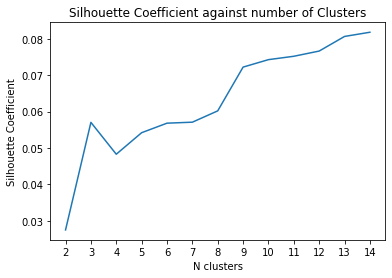

In [236]:
plt.plot(range(2,15), sil_coefs)
plt.xticks(range(2,15))
plt.title("Silhouette Coefficient against number of Clusters")
plt.xlabel("N clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [294]:
# Use 3 clusters

from sklearn.preprocessing import StandardScaler

modelkmeans = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter = 500, random_state=50)
modelkmeans.fit(X_transformed)

KMeans(max_iter=500, n_clusters=3, n_init=100, random_state=50)

In [295]:
print("Top terms per cluster:")
order_centroids = modelkmeans.cluster_centers_.argsort()[:, ::-1]
terms = count_vec.get_feature_names_out()
for i in range(3):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :7]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: tip complaint 911 surg call c issu
Cluster 1: children fort st john issu rcmp abduct
Cluster 2: b got miss old bc year get


# IMPORTANT!

From above, we can see that cluster 0 is actually the positive cluster, cluster 1 is the neutral cluster, cluster 2 is the negative cluster

In [300]:
unique, counts = np.unique(modelkmeans.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 62, 1: 193, 2: 1324}

Comparing the prediction and true value

In [322]:
# Recall we difined X_test = semi_test_labelled.tokens_stemmed  # Testing dataset are labelled

kmeans_test_true_vals = np.array(semi_test_labelled.sentiment)
kmeans_test_true_vals = kmeans_test_true_vals.astype('int32')
kmeans_test_true_vals

array([1, 1, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1,

In [325]:
kmeans_pred = modelkmeans.predict(X_transformed_test)

# Swapping cluster 1 and 2 (the labelled created by the model) to match our definition of 0, 1 and 2 sentiment
kmeans_pred[kmeans_pred == 1] = 11
kmeans_pred[kmeans_pred == 2] = 1
kmeans_pred[kmeans_pred == 11] = 2

kmeans_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,

In [324]:
accuracy_score(kmeans_test_true_vals, kmeans_pred)

0.5258855585831063

#### Additional Testing

In [213]:
n_clusters = 7

clust_df = pd.DataFrame(data=X_transformed,columns=features.columns)
clust_df = clust_df.assign(clusters = clust_labels[n_clusters-2])


In [214]:
other_dat = result.iloc[:, 1].to_frame()
other_dat = other_dat.assign(clusters = clust_labels[n_clusters-2])
other_dat.clusters.astype(str)
other_dat.set_index('clusters')

sentiment
clusters          
0                1
0                1
2                1
0                1
0                0
...            ...
4              NaN
0              NaN
0              NaN
0              NaN
0              NaN

[1579 rows x 1 columns]

In [172]:
other_dat

sentiment  clusters
x 1017         0         0
  1022         1         0
  23           0         0
  463          1         0
  915          1         2
...          ...       ...
y 1085       NaN         0
  1086       NaN         6
  1087       NaN         0
  1088       NaN         0
  1089       NaN         0

[1579 rows x 2 columns]

In [173]:
df = other_dat[other_dat.sentiment.notna()]

In [175]:
df_cluster_0 = df[df.clusters == 0]
df_cluster_1 = df[df.clusters == 1]
df_cluster_2 = df[df.clusters == 2]
df_cluster_3 = df[df.clusters == 3]
df_cluster_4 = df[df.clusters == 4]
df_cluster_5 = df[df.clusters == 5]
df_cluster_6 = df[df.clusters == 6]

In [176]:
df_cluster_0.value_counts()

sentiment  clusters
1          0           151
0          0            79
2          0            37
dtype: int64

In [177]:
df_cluster_1.value_counts()

sentiment  clusters
0          1           16
1          1           13
2          1            5
dtype: int64

## Summary of the models

Our analysis will be based on models trained on stemmed tokens.

In [178]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### Naive Bayes Classifier

In [ ]:
bayes_cm_train = confusion_matrix(y_stemmed_train,nb.predict(X_stemmed_train))
disp = ConfusionMatrixDisplay(confusion_matrix=bayes_cm_train)
disp.plot()
plt.show()

print('\nClassification Training Performance Summary:')
print(classification_report(y_stemmed_train,nb.predict(X_stemmed_train)))
print('Train accuracy with simple Naive Bayes:',accuracy_score(y_stemmed_train,nb.predict(X_stemmed_train)))

bayes_cm_test = confusion_matrix(y_stemmed_test,nb.predict(X_stemmed_test))
disp = ConfusionMatrixDisplay(confusion_matrix=bayes_cm_test)
disp.plot()
plt.show()

print('\nClassification Testing Performance Summary:')
print(classification_report(y_stemmed_test,nb.predict(X_stemmed_test)))
print('Test accuracy with simple Naive Bayes:',accuracy_score(y_stemmed_test,y_stemmed_preds))
print('\n\n')

### Multiclass Logistic Regression

In [ ]:
logreg_cm_train = confusion_matrix(y_stemmed_train,logreg.predict(X_stemmed_train))
disp = ConfusionMatrixDisplay(confusion_matrix=logreg_cm_train)
disp.plot()
plt.show()

print('\nClassification Training Performance Summary:')
print(classification_report(y_stemmed_train,logreg.predict(X_stemmed_train)))
print('Train accuracy with Multiclass Logistic Regression:',accuracy_score(y_stemmed_train,logreg.predict(X_stemmed_train)))

logreg_cm_test = confusion_matrix(y_stemmed_test,logreg.predict(X_stemmed_test))
disp = ConfusionMatrixDisplay(confusion_matrix=logreg_cm_test)
disp.plot()
plt.show()

print('\nClassification Testing Performance Summary:')
print(classification_report(y_stemmed_test,logreg.predict(X_stemmed_test)))
print('Test accuracy with Multiclass Logistic Regression:',accuracy_score(y_stemmed_test,logreg.predict(X_stemmed_test)))
print('\n\n')



## Extra: Word cloud


In [241]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Word cloud for positive classes

In [242]:
positive_content = ''
for row in labelled_data[labelled_data.sentiment=='2'].tokens_stemmed:
  for word in row:
    positive_content += ' ' + word



In [243]:
positive_word_cloud = WordCloud(collocations = False, background_color = 'white', scale=2).generate(positive_content)


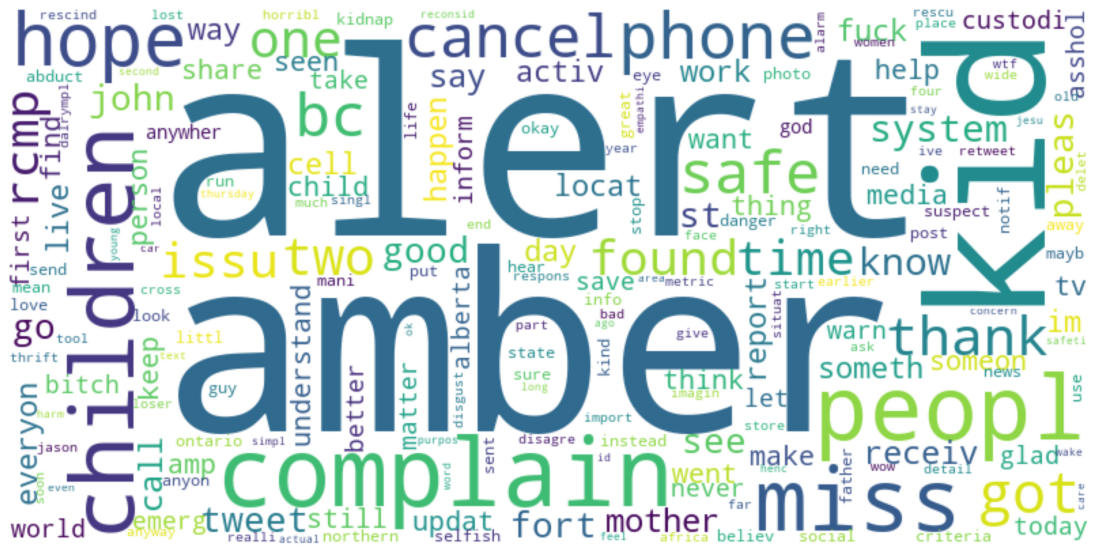

In [244]:
plt.figure(figsize=(20,10))
plt.imshow(positive_word_cloud, interpolation='gaussian')
plt.axis("off")
plt.show()

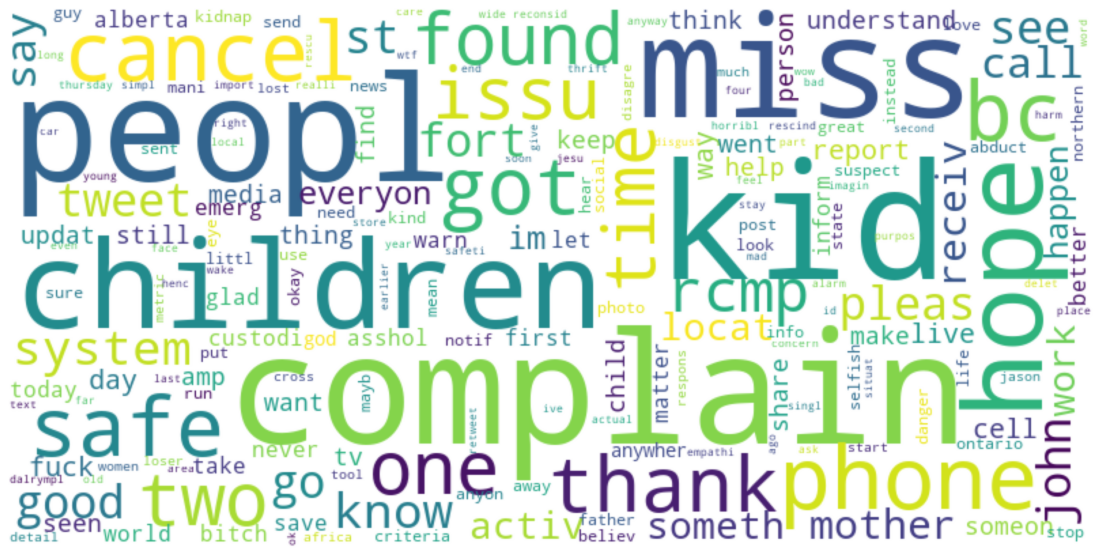

In [245]:
positive_content = ''
for row in labelled_data[labelled_data.sentiment=='2'].tokens_stemmed:
  for word in row:
    if word != 'amber' and word != 'alert':
      positive_content += ' ' + word

positive_word_cloud = WordCloud(collocations = False, background_color = 'white', scale=2).generate(positive_content)

plt.figure(figsize=(20,10))
plt.imshow(positive_word_cloud, interpolation='gaussian')
plt.axis("off")
plt.show()

### Word cloud for neutral classes

In [246]:
neutral_content = ''
for row in labelled_data[labelled_data.sentiment=='1'].tokens_stemmed:
  for word in row:
    neutral_content += ' ' + word

In [247]:
neutral_word_cloud = WordCloud(collocations = False, background_color = 'white', scale=2).generate(neutral_content)


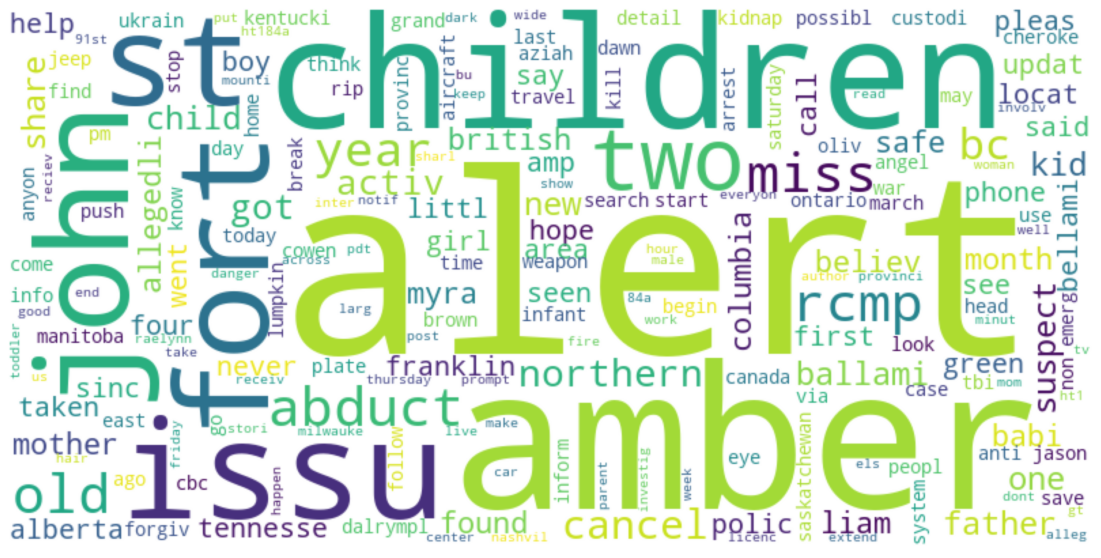

In [248]:
plt.figure(figsize=(20,10))
plt.imshow(neutral_word_cloud, interpolation='gaussian')
plt.axis("off")
plt.show()

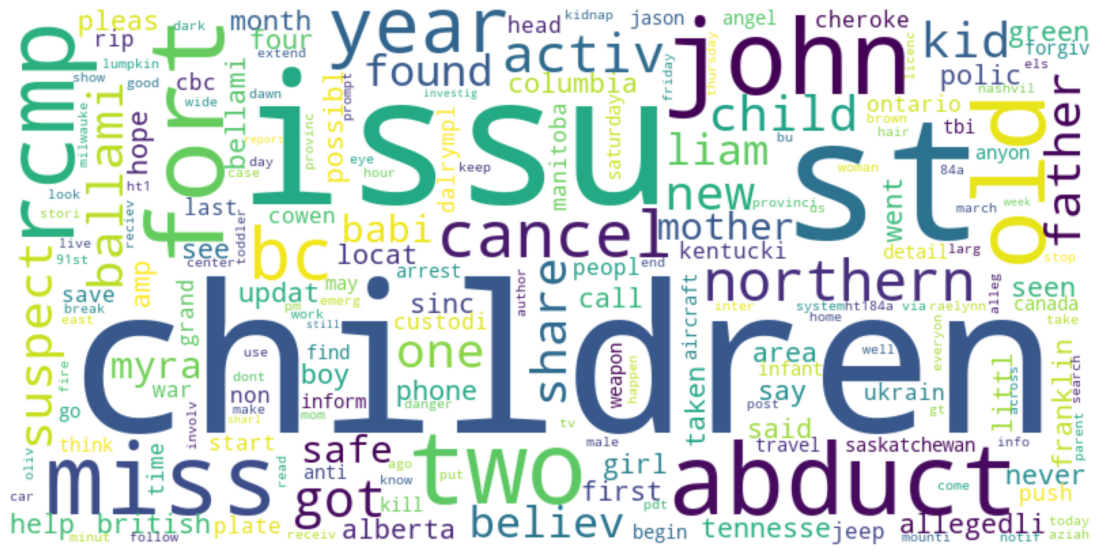

In [249]:
neutral_content = ''
for row in labelled_data[labelled_data.sentiment=='1'].tokens_stemmed:
  for word in row:
    if word != 'amber' and word != 'alert':
      neutral_content += ' ' + word

neutral_word_cloud = WordCloud(collocations = False, background_color = 'white', scale=2).generate(neutral_content)

plt.figure(figsize=(20,10))
plt.imshow(neutral_word_cloud, interpolation='gaussian')
plt.axis("off")
plt.show()

### Word cloud for negative classes

In [250]:
negative_content = ''
for row in labelled_data[labelled_data.sentiment=='0'].tokens_stemmed:
  for word in row:
    negative_content += ' ' + word

In [251]:
negative_word_cloud = WordCloud(collocations = False, background_color = 'white', scale=2).generate(negative_content)


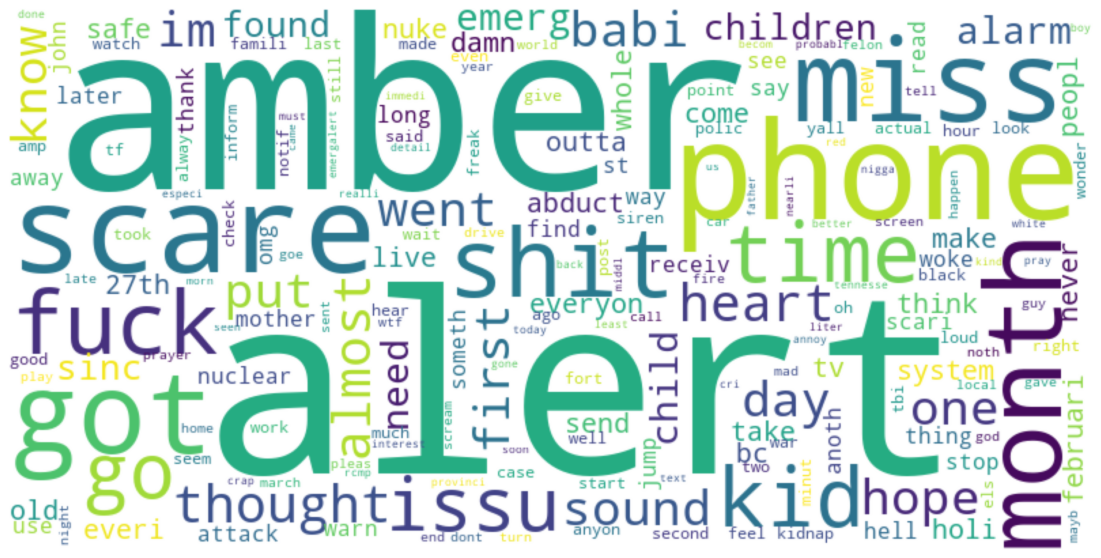

In [252]:
plt.figure(figsize=(20,10))
plt.imshow(negative_word_cloud, interpolation='gaussian')
plt.axis("off")
plt.show()

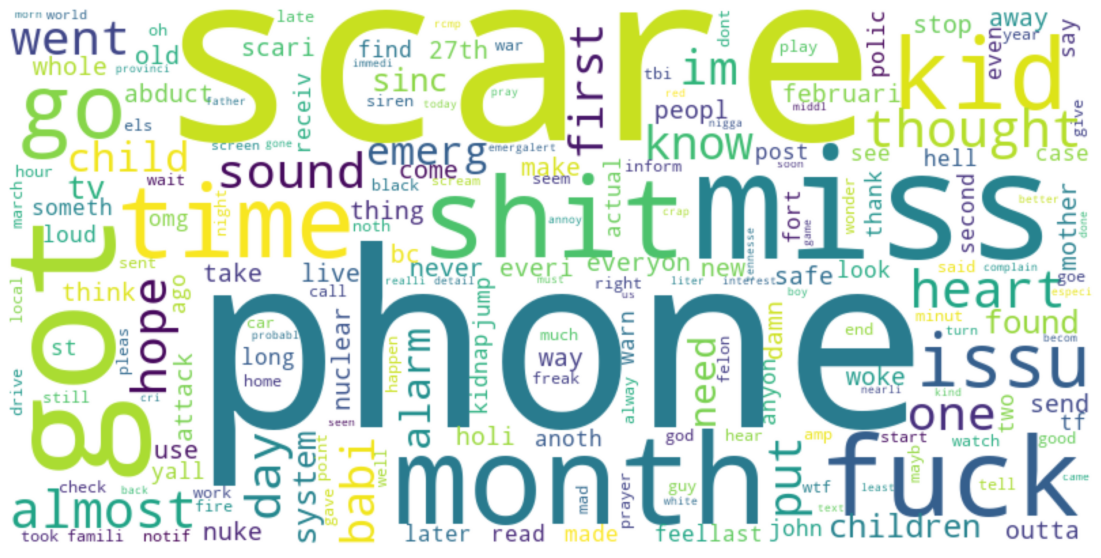

In [253]:
negative_content = ''
for row in labelled_data[labelled_data.sentiment=='0'].tokens_stemmed:
  for word in row:
    if word != 'amber' and word != 'alert':
      negative_content += ' ' + word

negative_word_cloud = WordCloud(collocations = False, background_color = 'white', scale=2).generate(negative_content)

plt.figure(figsize=(20,10))
plt.imshow(negative_word_cloud, interpolation='gaussian')
plt.axis("off")
plt.show()